In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('titanic.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.drop(['PassengerId','Name','Cabin','Ticket'], axis=1, inplace=True)

In [6]:
data.Sex= [1 if each == "male" else 0 for each in data.Sex]
data.Age = [np.mean(data.Age) if pd.isnull(each) else each for each in data.Age]
data.Embarked = [1 if each == "S" else (2 if each == "Q" else 0) for each in data.Embarked]

In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [8]:
y=data.Survived.values
x = data.drop(['Survived'], axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=45, test_size=0.25)

In [9]:
from sklearn.preprocessing import MinMaxScaler  
msc = MinMaxScaler()
xtrain = msc.fit_transform(x_train)
xtest = msc.transform(x_test)

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [11]:
lr.fit(xtrain,y_train)  

LogisticRegression()

In [12]:
yhead = lr.predict(xtest)

In [13]:
lr.score(xtest,y_test)

0.8340807174887892

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,yhead)
print(cm)

[[126  19]
 [ 18  60]]


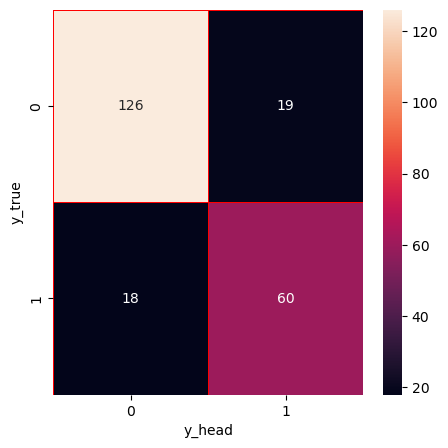

In [15]:
import seaborn as sns
f, ax = plt.subplots(figsize =(5,5))    
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)   
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [16]:
manuel_ozellikler = [3, 0, 22.0, 1, 0, 7.2500, 0]

In [17]:
ozellik_isimleri =x.columns.tolist()

In [18]:
manuel_df = pd.DataFrame([manuel_ozellikler], columns=ozellik_isimleri)

In [19]:
manuel_ozellikler_scaled = msc.transform(manuel_df) 

In [20]:
prediction = lr.predict(manuel_ozellikler_scaled)   

In [21]:
print(f" Yolcunun son durumu: {'Öldü' if prediction[0] == 0 else 'Hayatta'}")

 Yolcunun son durumu: Hayatta
